In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os
import pandas as pd
#balablu

import warnings
warnings.filterwarnings('ignore')

from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import statsmodels.api as smapi
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels as sm
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_predict

In [2]:
Forex = pd.read_csv(r'C:\Users\Imran Ajibola\Desktop\RAIN\PROJECTS\Time series forcast\Learning\Dataset.csv')
Forex.head(30)

,Date,Price
0,28/11/2022,443.50
1,27/11/2022,443.26
2,26/11/2022,443.26
3,25/11/2022,443.26
4,24/11/2022,443.45
5,23/11/2022,443.30
6,22/11/2022,443.13
7,21/11/2022,442.99
8,20/11/2022,442.66
9,19/11/2022,442.16


In [3]:
Forex.shape

(366, 2)

In [4]:
from datetime import datetime
Forex['Date']=pd.to_datetime(Forex['Date'],infer_datetime_format=True)

In [5]:
Forex

,Date,Price
0,2022-11-28,443.50
1,2022-11-27,443.26
2,2022-11-26,443.26
3,2022-11-25,443.26
4,2022-11-24,443.45
...,...,...
361,2021-12-02,409.70
362,2021-12-01,409.66
363,2021-11-30,409.64
364,2021-11-29,409.64


In [6]:
Forexind = Forex.set_index('Date')
Forexind = Forexind.sort_index(ascending=True)
Forexind

,Price
Date,
2021-11-28,409.64
2021-11-29,409.64
2021-11-30,409.64
2021-12-01,409.66
2021-12-02,409.70
...,...
2022-11-24,443.45
2022-11-25,443.26
2022-11-26,443.26


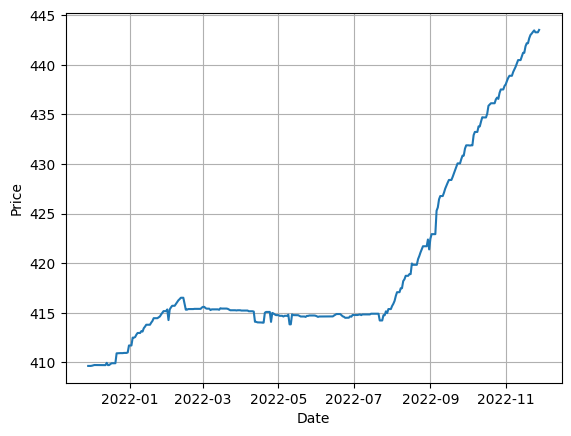

In [7]:
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid()
plt.plot(Forexind)

In [8]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=80).mean()
    movingSTD = timeseries.rolling(window=80).std()
    
    #Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.ylim(400, 450)
    plt.grid()
    plt.show(block=False)
    
  #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    Forex_test = adfuller(timeseries['Price'], autolag='AIC')
    dfoutput = pd.Series(Forex_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in Forex_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

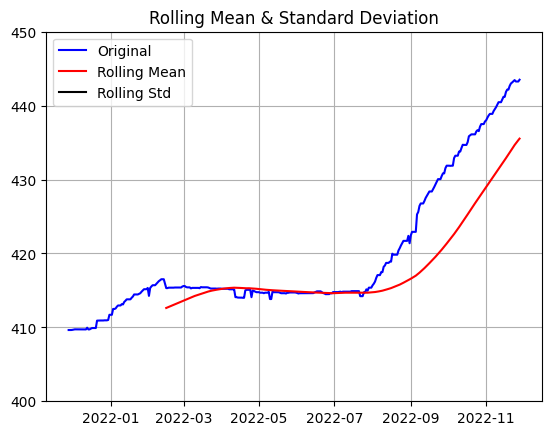

Results of Dickey Fuller Test:
Test Statistic                   0.325189
p-value                          0.978471
#Lags Used                      16.000000
Number of Observations Used    349.000000
Critical Value (1%)             -3.449227
Critical Value (5%)             -2.869857
Critical Value (10%)            -2.571201
dtype: float64


In [9]:
test_stationarity(Forexind)

In [10]:
Forex_log = (Forexind)

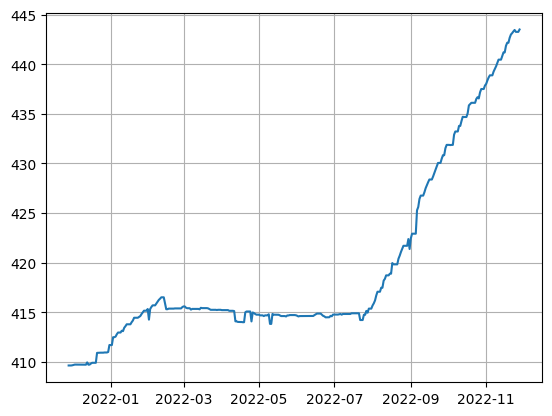

In [11]:
plt.plot(Forex_log)
plt.grid()

In [12]:
rollmean_log = Forex_log.rolling(window=80).mean()
rollstd_log = Forex_log.rolling(window=80).std()

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation (Logarithmic Scale)')

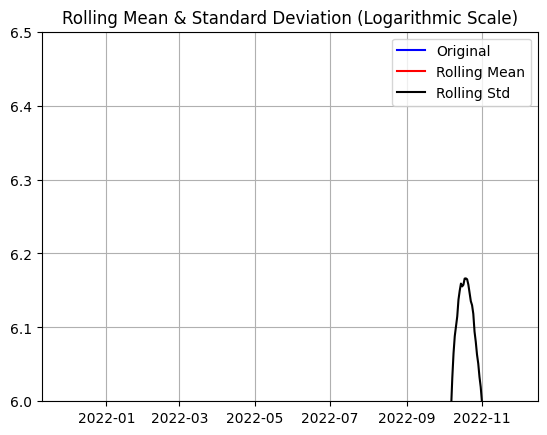

In [13]:
plt.plot(Forex_log, color='blue', label='Original')
plt.plot(rollmean_log, color='red', label='Rolling Mean')
plt.plot(rollstd_log, color='black', label='Rolling Std')
plt.ylim(6,6.5)
plt.legend(loc='best')
plt.grid()
plt.title('Rolling Mean & Standard Deviation (Logarithmic Scale)')

In [14]:
Forex_new = Forex_log - rollmean_log

In [15]:
Forex_new.head()

,Price
Date,
2021-11-28,NaN
2021-11-29,NaN
2021-11-30,NaN
2021-12-01,NaN
2021-12-02,NaN


In [16]:
Forex_new.dropna(inplace=True)

In [17]:
Forex_new.head()

,Price
Date,
2022-02-15,2.686625
2022-02-16,2.615750
2022-02-17,2.604125
2022-02-18,2.532500
2022-02-19,2.461125


In [18]:
def test_stationarity1(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=80).mean()
    movingSTD = timeseries.rolling(window=80).std()
    
    #Plot rolling statistics
    plt.plot(timeseries, color='blue', label='Original')
    plt.plot(movingAverage, color='red', label='Rolling Mean')
    plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.grid()
    plt.show(block=False)
    
  #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    Forex_test = adfuller(timeseries['Price'], autolag='AIC')
    dfoutput = pd.Series(Forex_test[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in Forex_test[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

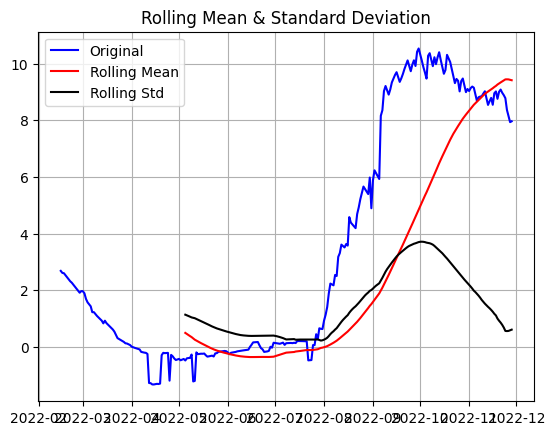

Results of Dickey Fuller Test:
Test Statistic                  -1.311384
p-value                          0.623948
#Lags Used                      16.000000
Number of Observations Used    270.000000
Critical Value (1%)             -3.454804
Critical Value (5%)             -2.872305
Critical Value (10%)            -2.572506
dtype: float64


In [19]:
test_stationarity1(Forex_new)

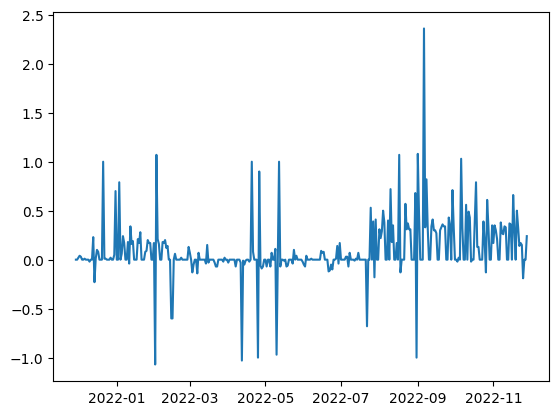

In [20]:
Forex_log_diff = Forex_log - Forex_log.shift()
plt.plot(Forex_log_diff)

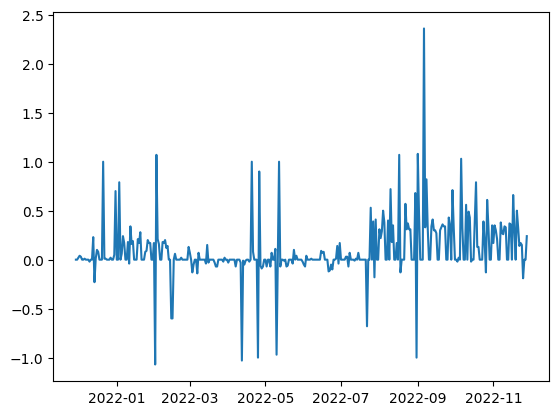

In [21]:
Forex_log_diff.dropna(inplace=True)
plt.plot(Forex_log_diff)

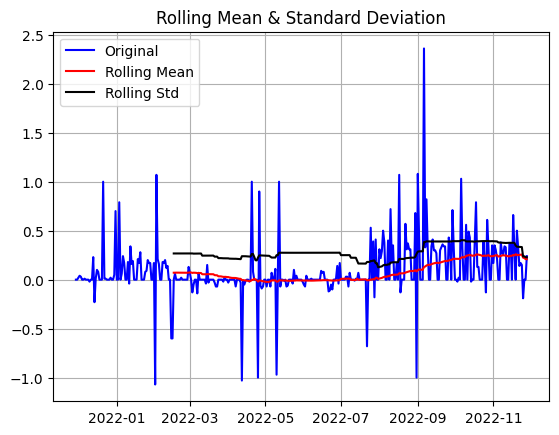

Results of Dickey Fuller Test:
Test Statistic                  -1.907204
p-value                          0.328680
#Lags Used                      15.000000
Number of Observations Used    349.000000
Critical Value (1%)             -3.449227
Critical Value (5%)             -2.869857
Critical Value (10%)            -2.571201
dtype: float64


In [22]:
test_stationarity1(Forex_log_diff)

In [23]:
Forex_log

,Price
Date,
2021-11-28,409.64
2021-11-29,409.64
2021-11-30,409.64
2021-12-01,409.66
2021-12-02,409.70
...,...
2022-11-24,443.45
2022-11-25,443.26
2022-11-26,443.26


In [24]:

#decomposition = seasonal_decompose(Forex_log)
#Forex_log.sort_index(inplace=True)


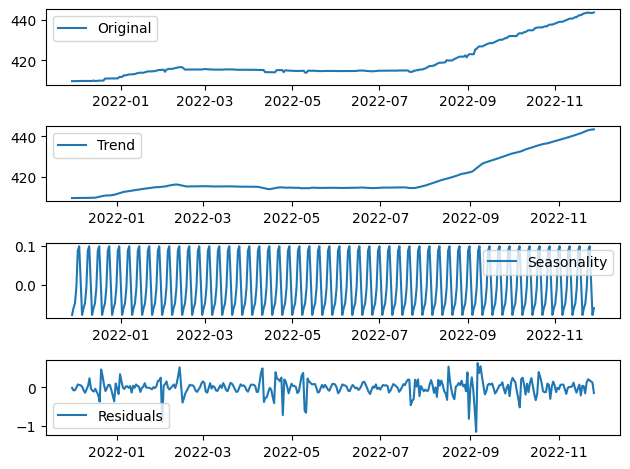

In [25]:

from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(Forex_log)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
plt.plot(Forex_log, label='Original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

In [26]:
Forex_decompose = residual
Forex_decompose.dropna(inplace=True)

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

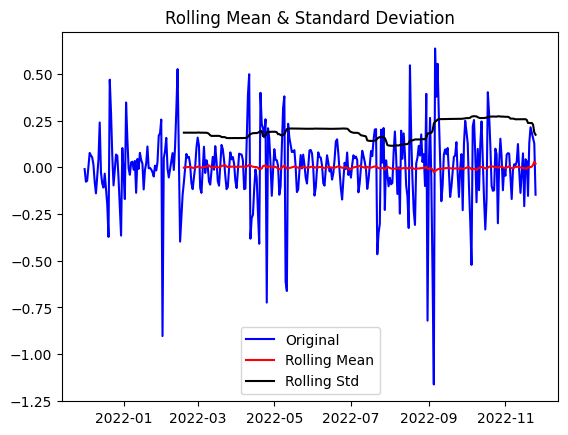

In [27]:
rollmean_decompose = Forex_decompose.rolling(window=80).mean()
rollstd_decompose = Forex_decompose.rolling(window=80).std()

plt.plot(Forex_decompose, color='blue', label='Original')
plt.plot(rollmean_decompose, color='red', label='Rolling Mean')
plt.plot(rollstd_decompose, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

In [28]:
lag_acf = acf(Forex_log_diff, nlags=20)
lag_pacf = pacf(Forex_log_diff, nlags=20, method='ols')

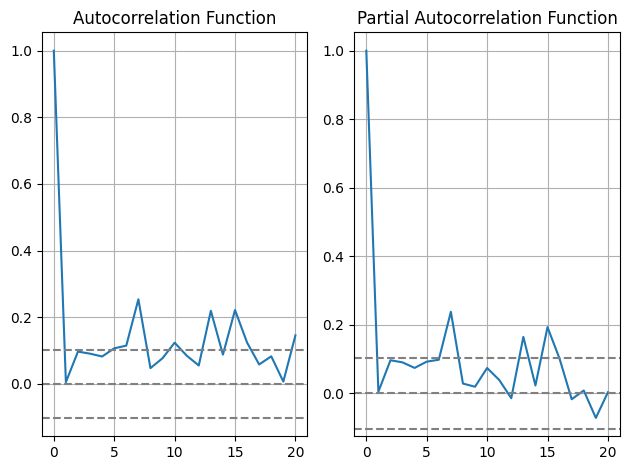

In [29]:
#Plot ACF:
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Forex_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Forex_log_diff)), linestyle='--', color='gray')
plt.grid()
plt.title('Autocorrelation Function')            

#Plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color='gray')
plt.axhline(y=-1.96/np.sqrt(len(Forex_log_diff)), linestyle='--', color='gray')
plt.axhline(y=1.96/np.sqrt(len(Forex_log_diff)), linestyle='--', color='gray')
plt.grid()
plt.title('Partial Autocorrelation Function')
            
plt.tight_layout()

c:\Users\Imran Ajibola\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Imran Ajibola\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Imran Ajibola\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Plotting AR model


nan

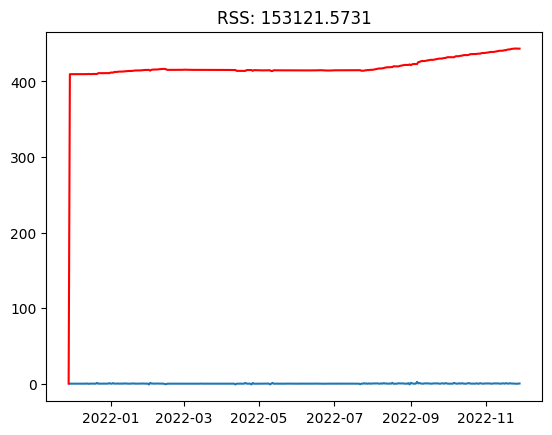

In [30]:
model1 = smapi.tsa.arima.ARIMA(Forex_log, order=(1,1,1))
results_AR = model1.fit()
plt.plot(Forex_log_diff)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues)))
print('Plotting AR model')
sum(results_AR.fittedvalues)
sum((results_AR.fittedvalues - Forex_log_diff['Price'])**2)

c:\Users\Imran Ajibola\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Imran Ajibola\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Imran Ajibola\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Plotting MA model


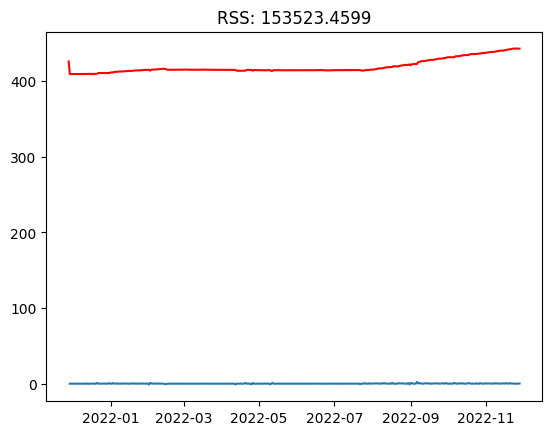

In [31]:
model2 = smapi.tsa.arima.ARIMA(Forex_log, order=(1,0,1))
results_MA = model2.fit()
plt.plot(Forex_log_diff)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_MA.fittedvalues)))
print('Plotting MA model')

c:\Users\Imran Ajibola\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Imran Ajibola\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\Imran Ajibola\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


Plotting ARIMA model


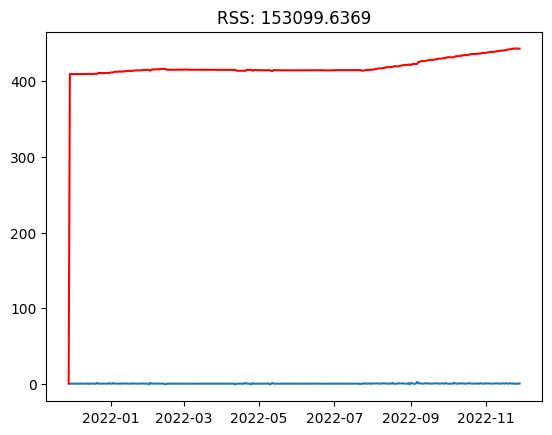

In [32]:
model = smapi.tsa.arima.ARIMA(Forex_log, order=(0,1,2))
results_ARIMA = model.fit()
plt.plot(Forex_log_diff)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'%sum((results_ARIMA.fittedvalues)))
print('Plotting ARIMA model')

In [33]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy=True)
predictions_ARIMA_diff.head()

Date
2021-11-28      0.000000
2021-11-29    409.640002
2021-11-30    409.640005
2021-12-01    409.639999
2021-12-02    409.661015
dtype: float64

In [34]:
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
predictions_ARIMA_diff_cumsum.head()

Date
2021-11-28       0.000000
2021-11-29     409.640002
2021-11-30     819.280007
2021-12-01    1228.920006
2021-12-02    1638.581021
dtype: float64

In [35]:
predictions_ARIMA_log = pd.Series(Forex_log['Price'].iloc[0], index=Forex_log.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

Date
2021-11-28     409.640000
2021-11-29     819.280002
2021-11-30    1228.920007
2021-12-01    1638.560006
2021-12-02    2048.221021
dtype: float64

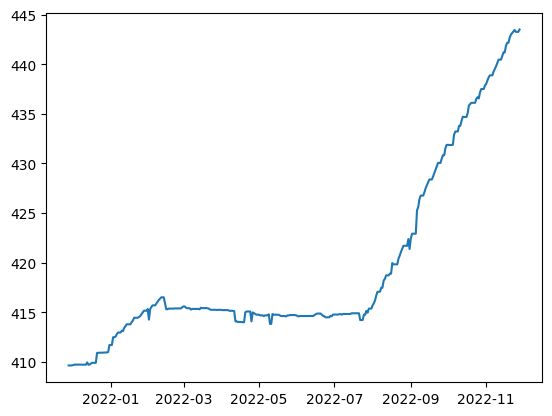

In [36]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(Forexind)


In [37]:
#plt.plot(predictions_ARIMA)

In [38]:
Forex_log

,Price
Date,
2021-11-28,409.64
2021-11-29,409.64
2021-11-30,409.64
2021-12-01,409.66
2021-12-02,409.70
...,...
2022-11-24,443.45
2022-11-25,443.26
2022-11-26,443.26


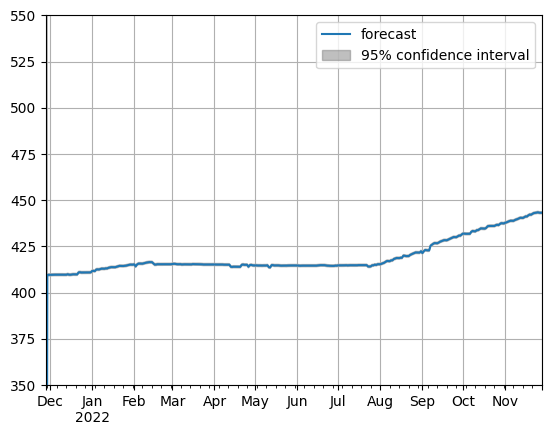

In [39]:
plot_predict(results_ARIMA, '2021-11-28', '2022-11-28')
plt.ylim(350, 550)
plt.grid()

In [40]:
df_result = pd.DataFrame(results_ARIMA.forecast(steps=1))
df_result  

,0
2022-11-29,443.516103


In [41]:
df_result.columns = ['Price']

In [42]:
df_result

,Price
2022-11-29,443.516103
